In [1]:
!pip install pandas

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns

In [3]:
data_frame = pd.read_csv("green_tech_data.csv")   #comma separated values
data_frame.head(5)

,carbon_emissions,energy_output,renewability_index,cost_efficiency,sustainability
0,181.089042,128.286267,0.642032,0.732568,1
1,382.750007,672.769370,0.084140,2.891096,0
2,306.197880,382.920383,0.161629,2.932858,0
3,259.530469,557.713622,0.898554,3.368435,0
4,104.606524,916.809827,0.606429,3.767411,0


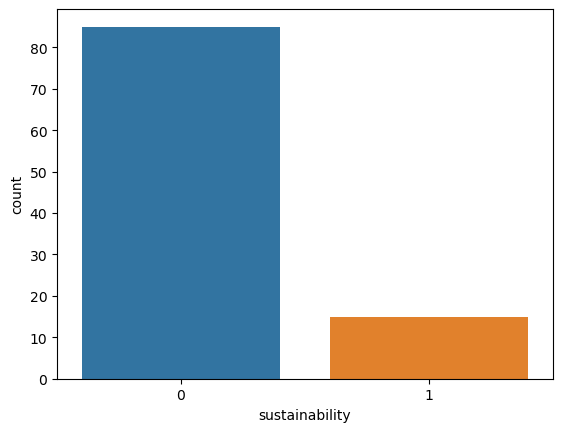

In [12]:
#countplot
df = pd.DataFrame(data_frame)

# Create a pair plot
sns.countplot(x='sustainability',data=df)
plt.show()


In [7]:
data_frame.isnull().sum()

carbon_emissions      0
energy_output         0
renewability_index    0
cost_efficiency       0
sustainability        0
dtype: int64

In [10]:
data_frame.shape

(100, 5)

In [8]:
data_frame.dtypes

carbon_emissions      float64
energy_output         float64
renewability_index    float64
cost_efficiency       float64
sustainability          int64
dtype: object

In [9]:
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   carbon_emissions    100 non-null    float64
 1   energy_output       100 non-null    float64
 2   renewability_index  100 non-null    float64
 3   cost_efficiency     100 non-null    float64
 4   sustainability      100 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 4.0 KB


In [14]:
X = df[['carbon_emissions', 'energy_output', 'renewability_index', 'cost_efficiency']]
y = df['sustainability']

In [15]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=42)

In [16]:
model=LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [17]:
y_pred=model.predict(X_test) 

In [18]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
      dtype=int64)

In [21]:
from sklearn.metrics import accuracy_score

accuracy_score_value = accuracy_score(y_test, y_pred)
print("The Accuracy of the model is", accuracy_score_value)


The Accuracy of the model is 0.95


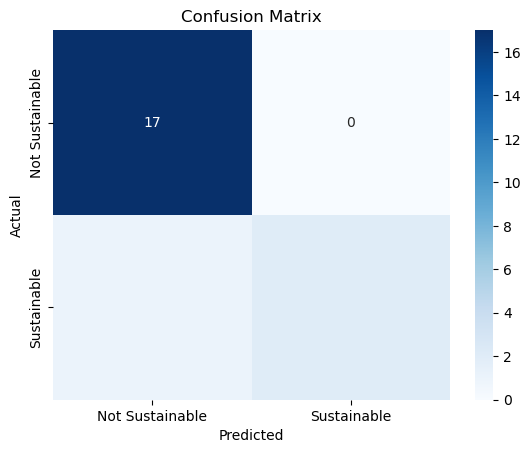

In [22]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Not Sustainable', 'Sustainable'], 
            yticklabels=['Not Sustainable', 'Sustainable'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

[[17  0]
 [ 1  2]]


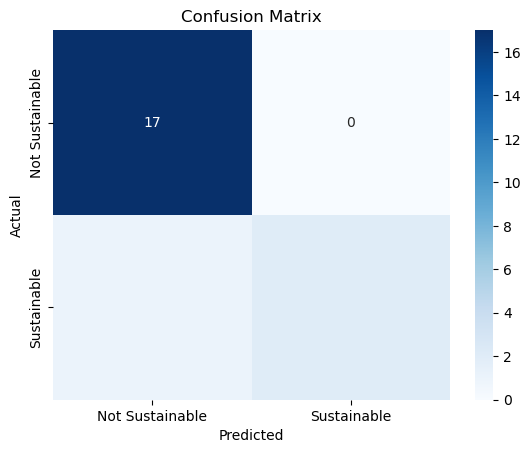

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Check if the confusion matrix is of shape (2, 2)
print(conf_matrix)  # Debugging: print out the confusion matrix

# Create the heatmap with the confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Not Sustainable', 'Sustainable'], 
            yticklabels=['Not Sustainable', 'Sustainable'])

# Add labels and title
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

# Display the plot
plt.show()


In [24]:
#Classification report
print(classification_report(y_test,y_pred,target_names=['Not Sustainable', 'Sustainable']))

                 precision    recall  f1-score   support

Not Sustainable       0.94      1.00      0.97        17
    Sustainable       1.00      0.67      0.80         3

       accuracy                           0.95        20
      macro avg       0.97      0.83      0.89        20
   weighted avg       0.95      0.95      0.95        20



In [25]:
import joblib
#save the model to a file
joblib.dump(model,'appliance_energy_model.pkl')

['appliance_energy_model.pkl']

In [26]:
model=joblib.load('appliance_energy_model.pkl')

In [27]:
input_data=[[26.97]]